<a href="https://colab.research.google.com/github/IUBAYAR/MIS-351/blob/main/19032025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1:The Theater Row\

8 eligible bachelors and 7 beautiful models happen randomly to have purchased single seats in the same 15-seat row of a theater. On the average, how many pairs of adjacent seats are ticketed for marriageable couples?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
liste = []
for i in range(10**4):
  #defining the sample space
  sample_space =['M' for i in range(8)] + ['F' for i in range(7)]
  #creating a random sequence of ladies and gentlemen
  np.random.shuffle(sample_space)

  #possible issues:
  # * starts with the same gender twice
  # * ends with the same gender twice
  # * 3 same genders in a row

  potentially = 7
  if sample_space[0] == sample_space[1]:
    potentially -=1
    sample_space.pop(0)
  if sample_space[-1] == sample_space[-2]:
    potentially -=1
    sample_space.pop(-1)
  for i in range(1, len(sample_space)-1):
    if (sample_space[i-1] == sample_space[i]) and (sample_space[i] == sample_space[i+1]):
      potentially -=1
  liste.append(potentially)
np.array(liste).mean()



3.8637

Q2: ##  Job interviewer's dilemma

For a job vacancy there are 30 applicants but the company has limited human resources personnel
and may only interview 10 applicants.
Only after an interview the company can identify the fitness of a certain applicant.
The company also knows how the labor market stats:\
The job applicants population is normally distributed with a mean of 50 and a standard deviation 20.

In [9]:
#Importing necessary python modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Text(0, 0.5, 'Frequency')

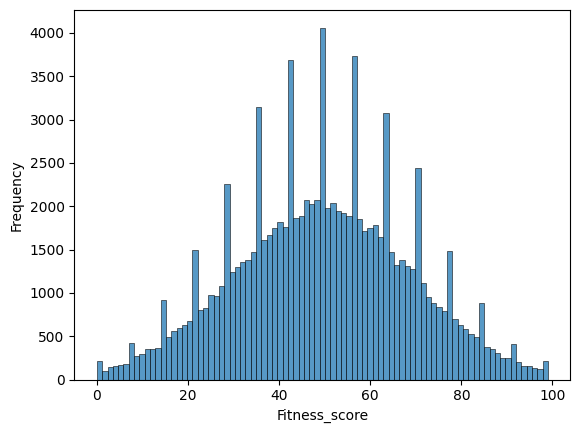

In [10]:
population_data = [int(i) for i in np.random.normal(loc = 50, scale = 20, size = 10**5) if i>=0 and i<=100]

sns. histplot(population_data)

plt.xlabel('Fitness_score')
plt.ylabel('Frequency')

Now you see.

There will be a possibility that the interviewer may identify an applicant who is a better fit for the position on the remaining trials.

And of course, rejecting a current applicant may be a huge regret too...

So, given a spesific 30 applicants being interviewed on a random squence, what would be a good scores to settle for each trial?

In [11]:
#converting population data to a pandas series to draw a random sample with a random_state =351
applicants = pd.Series(population_data).sample(frac = 30 / len(population_data), random_state = 351)
#converting back to a list
applicants = applicants.to_list()

applicants

[43,
 54,
 58,
 38,
 37,
 54,
 40,
 76,
 82,
 61,
 57,
 82,
 76,
 68,
 12,
 37,
 72,
 48,
 36,
 32,
 50,
 44,
 31,
 37,
 43,
 64,
 62,
 17,
 37,
 42]

In [23]:
#trial 1: picking up a random applicant
current_applicant = np.random.choice(applicants, replace=False)
#removing the current applicant from the uninterviewed crowd
applicants.remove(current_applicant)
current_applicant

np.int64(62)

In [25]:
#The probability of getting a better applicant on the remaining trails based on the population information
1 - (
len(
pd.Series(population_data) [pd.Series(population_data)<= current_applicant]
) / len(population_data)
)**9

0.9283482851418746

In [28]:
#trial 2: picking a random applicant
current_applicant = np.random.choice(applicants, replace=False)
#removing the current applicant from the uninterviewed crowd
applicants.remove(current_applicant)
current_applicant

np.int64(61)

In [29]:
#The probability of getting a better applicant on the remaining trails based on the population information
1 - (
len(
pd.Series(population_data) [pd.Series(population_data)<= current_applicant]
) / len(population_data)
)**8

0.9198054996770918

In [30]:
#trial 3: picking up a random applicant
current_applicant = np.random.choice(applicants, replace=False)
#removing the current applicant from the uninterviewed crowd
applicants.remove(current_applicant)
current_applicant

np.int64(50)

In [31]:
#The probability of getting a better applicant on the remaining trails based on the population information
1 - (
len(
pd.Series(population_data) [pd.Series(population_data)<= current_applicant]
) / len(population_data)
)**7

0.9895856745918422

In [33]:
#A generalization of trials and outcomes
instance = {}

applicants = pd.Series(population_data).sample(frac=30/len(population_data), random_state =351).to_list()

for t in np.arange(1, 10+1):
  current_applicant = np.random.choice(applicants, replace = False)
  applicants.remove(current_applicant)

  instance[t] = current_applicant, 1-(
    len(
    pd.Series(population_data) [pd.Series(population_data)<= current_applicant]
    ) / len(population_data)
    )**(10-t)
instance

{np.int64(1): (np.int64(44), np.float64(0.9997478451340307)),
 np.int64(2): (np.int64(37), np.float64(0.9999707453890496)),
 np.int64(3): (np.int64(82), np.float64(0.26735550661125906)),
 np.int64(4): (np.int64(68), np.float64(0.6664463721710481)),
 np.int64(5): (np.int64(40), np.float64(0.9964176316271666)),
 np.int64(6): (np.int64(37), np.float64(0.9945912468210923)),
 np.int64(7): (np.int64(54), np.float64(0.7831767906587661)),
 np.int64(8): (np.int64(36), np.float64(0.9350506908869161)),
 np.int64(9): (np.int64(64), np.float64(0.2227913709848861)),
 np.int64(10): (np.int64(82), np.float64(0.0))}

What is the probability of regretting to reject an applicant scoring over 70?

In [37]:
#  A generalization of trials and outcomes
liste = []

for i in np.arange(10**3):

  instance = []

  regret = 0

  applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 ).to_list()

  k = None
  for t in np.arange(10):

    current_applicant = np.random.choice( applicants, replace = False )
    applicants.remove( current_applicant )

    instance.append( current_applicant )

    if (instance[-1] >= 70) and (k == None):
      k = t

    if k != None:
      regret += len( pd.Series( instance[k:] )[ pd.Series(instance[k:]) > instance[k] ] )

  regret = bool(1 - bool(regret))

  if k != None:
    liste.append(regret)

np.array(liste).mean()

np.float64(0.7213225371120108)

What is the probability of rejecting to hire the first applicant scoring over 75?

In [39]:
#  A generalization of trials and outcomes
liste = []

for i in np.arange(10**4):

  instance = []

  regret = 0

  applicants = pd.Series( population_data ).sample( frac = 30/len( population_data ), random_state = 351 ).to_list()

  k = None
  for t in np.arange(10):

    current_applicant = np.random.choice( applicants, replace = False )
    applicants.remove( current_applicant )

    instance.append( current_applicant )

    if (instance[-1] >= 75) and (k == None):
      k = t

    if k != None:
      regret += len( pd.Series( instance[k:] )[ pd.Series(instance[k:]) > instance[k] ] )

  regret = bool(regret)

  if k != None:
    liste.append(regret)

np.array(liste).mean()

np.float64(0.1860323640345541)